# SVM & Random Forest classify of disease

In [ ]:
import pandas as pd 

data = pd.read_csv("data/Training.csv")

data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='object', length=134)

In [51]:
data = data.drop(columns="Unnamed: 133")

In [52]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [54]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [56]:
meta = data.drop('prognosis',axis = True)

<Axes: >

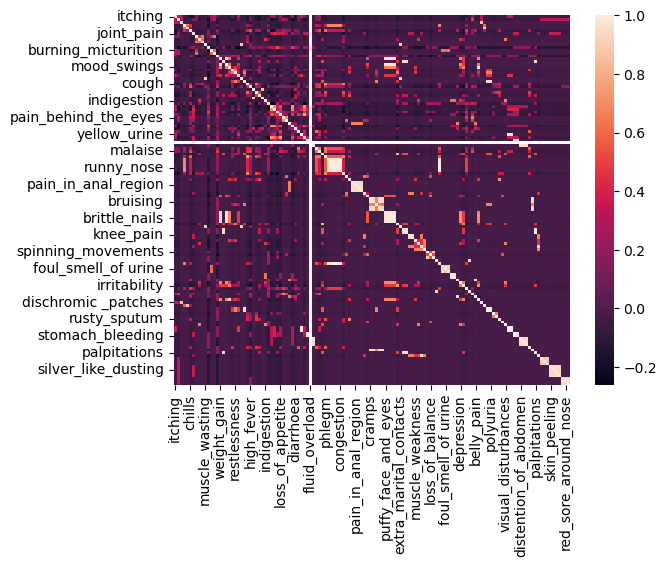

In [57]:
corr = meta.corr()

sns.heatmap(corr)

In [58]:
dis = data['prognosis'].unique()
dis 

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score , classification_report, precision_score, recall_score, f1_score

In [60]:
y = data['prognosis']

In [61]:
x = data[['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills','joint_pain', 'stomach_pain', 'vomiting', 'fatigue', 'weight_loss', 'anxiety','high_fever', 'headache', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes','back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'sinus_pressure','runny_nose', 'chest_pain', 'weakness_in_limbs', 'pain_during_bowel_movements','neck_pain', 'dizziness', 'cramps', 'obesity', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'excessive_hunger', 'drying_and_tingling_lips','slurred_speech', 'muscle_weakness', 'stiff_neck', 'loss_of_balance','unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort','continuous_feel_of_urine', 'internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'altered_sensorium', 'red_spots_over_body', 'belly_pain','increased_appetite', 'lack_of_concentration', 'visual_disturbances']]

# 80:20 split

In [62]:
x_train80 , x_test20 , y_train80 , y_test20 = train_test_split(x , y , test_size=0.2 , random_state=42)

In [63]:
svm8020 = SVC(kernel='linear')

In [64]:
svm8020.fit(x_train80 , y_train80)

SVC(kernel='linear')

In [65]:
y_pred20 = svm8020.predict(x_test20)

In [66]:
trn_pred8020 = svm8020.predict(x_train80)
trn_acc8020 = accuracy_score(y_train80 , trn_pred8020)
print("Train accuracy (80:20) =" , trn_acc8020 * 100 )
testacc8020 = accuracy_score(y_test20 , y_pred20)
print("Test accuracy (80:20) =" , testacc8020*100 )
print("\nClassification Report:\n", classification_report(y_test20, y_pred20))

Train accuracy (80:20) = 98.47560975609755
Test accuracy (80:20) = 97.5609756097561

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       0.78      0.93      0.85        30
                                   Acne       0.80      1.00      0.89        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      0.88      0.94        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15

# 60:40

In [67]:
x_train60 , X_test40 , y_train60 , y_test40 = train_test_split(x ,y , test_size=0.4 , random_state=42)

In [68]:
svm6040 = SVC(kernel='linear')

svm6040.fit(x_train60 ,y_train60)

SVC(kernel='linear')

In [69]:
y_trnpred60 = svm6040.predict(x_train60)
trn_acc6040 = accuracy_score(y_train60 , y_trnpred60)
print("Train accuracy (60:40) =" , trn_acc6040 * 100 )


y_pred40 = svm6040.predict(X_test40)
tst_acc6040 = accuracy_score(y_test40 , y_pred40)
print("Test accuracy (60:40) =" , tst_acc6040 * 100 )
print("\nClassification Report:\n", classification_report(y_test40, y_pred40))


Train accuracy (60:40) = 98.40785907859079
Test accuracy (60:40) = 98.119918699187

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        41
                                   AIDS       0.81      0.93      0.87        46
                                   Acne       0.85      1.00      0.92        52
                    Alcoholic hepatitis       1.00      1.00      1.00        55
                                Allergy       1.00      1.00      1.00        41
                              Arthritis       1.00      1.00      1.00        46
                       Bronchial Asthma       1.00      0.90      0.95        52
                   Cervical spondylosis       1.00      1.00      1.00        45
                            Chicken pox       1.00      1.00      1.00        45
                    Chronic cholestasis       1.00      1.00      1.00        47


# 70:30

In [70]:
x_train70 , x_test30 , y_train70 , y_test30 = train_test_split(x , y , train_size=0.7, test_size=0.3 , random_state=42)

In [71]:
svm7030 = SVC(kernel='linear')

In [72]:
svm7030.fit(x_train70 , y_train70)

SVC(kernel='linear')

In [73]:
y_pred30 = svm7030.predict(x_test30)

y_trnpred70 = svm7030.predict(x_train70)

tst_acc7030 = accuracy_score(y_test30 , y_pred30 )

trn_acc7030 = accuracy_score(y_train70 , y_trnpred70)

In [74]:
print("Train accuracy (70:30) =" , trn_acc7030 * 100 )
print("Test accuracy (70:30) =" , tst_acc7030 * 100 )
print("\nClassification Report:\n", classification_report(y_test30, y_pred30))

Train accuracy (70:30) = 98.40301974448316
Test accuracy (70:30) = 98.03523035230353

Classification Report:
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        32
                                   AIDS       0.80      0.95      0.87        39
                                   Acne       0.87      1.00      0.93        41
                    Alcoholic hepatitis       1.00      1.00      1.00        36
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        36
                       Bronchial Asthma       1.00      0.91      0.95        44
                   Cervical spondylosis       1.00      1.00      1.00        32
                            Chicken pox       1.00      1.00      1.00        35
                    Chronic cholestasis       1.00      1.00      1.00        3

# summary about this split 

In [75]:

print("Train accuracy (60:40) =" , trn_acc6040 * 100 )
print("Train accuracy (70:30) =" , trn_acc7030 * 100 )
print("Train accuracy (80:20) =" , trn_acc8020 * 100 )


Train accuracy (60:40) = 98.40785907859079
Train accuracy (70:30) = 98.40301974448316
Train accuracy (80:20) = 98.47560975609755


In [76]:
print("Test accuracy (60:40) =" , tst_acc6040 * 100 )
print("Test accuracy (70:30) =" , tst_acc7030 * 100 )
print("Test accuracy (80:20) =" , testacc8020 * 100 )

Test accuracy (60:40) = 98.119918699187
Test accuracy (70:30) = 98.03523035230353
Test accuracy (80:20) = 97.5609756097561


# know the work

In [77]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   itching                       4920 non-null   int64
 1   skin_rash                     4920 non-null   int64
 2   nodal_skin_eruptions          4920 non-null   int64
 3   continuous_sneezing           4920 non-null   int64
 4   chills                        4920 non-null   int64
 5   joint_pain                    4920 non-null   int64
 6   stomach_pain                  4920 non-null   int64
 7   vomiting                      4920 non-null   int64
 8   fatigue                       4920 non-null   int64
 9   weight_loss                   4920 non-null   int64
 10  anxiety                       4920 non-null   int64
 11  high_fever                    4920 non-null   int64
 12  headache                      4920 non-null   int64
 13  nausea                        492

In [78]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4920 entries, 0 to 4919
Series name: prognosis
Non-Null Count  Dtype 
--------------  ----- 
4920 non-null   object
dtypes: object(1)
memory usage: 38.6+ KB


taking high train accuracy model AND train the model with 

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100 , random_state=42)

rf.fit(x_train80,y_train80)

RandomForestClassifier(random_state=42)

In [80]:
y_rf = rf.predict(x_test20)
yrftrn = rf.predict(x_train80)

In [81]:
rfacc = accuracy_score(y_test20 , y_rf)
print("Test accuracy(80 20) =",rfacc * 100)
rfpreac = accuracy_score( yrftrn , y_train80)
print("Train accuracy(80 20) =",rfpreac * 100)
print(classification_report(y_test20 , y_rf))

Test accuracy(80 20) = 97.5609756097561
Train accuracy(80 20) = 98.47560975609755
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       0.78      0.93      0.85        30
                                   Acne       0.80      1.00      0.89        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      0.88      0.94        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                          

In [82]:
from sklearn.tree import plot_tree
tree_to_plot = rf.estimators_[0]

In [83]:
all_symptoms = [
    'itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills', 'joint_pain',
    'stomach_pain', 'vomiting', 'fatigue', 'weight_loss', 'anxiety', 'high_fever', 'headache',
    'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation',
    'abdominal_pain', 'diarrhoea', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
    'swelling_of_stomach', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation',
    'sinus_pressure', 'runny_nose', 'chest_pain', 'weakness_in_limbs', 'pain_during_bowel_movements',
    'neck_pain', 'dizziness', 'cramps', 'obesity', 'puffy_face_and_eyes', 'enlarged_thyroid',
    'brittle_nails', 'excessive_hunger', 'drying_and_tingling_lips', 'slurred_speech', 'muscle_weakness',
    'stiff_neck', 'loss_of_balance', 'unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell',
    'bladder_discomfort', 'continuous_feel_of_urine', 'internal_itching', 'toxic_look_(typhos)',
    'depression', 'irritability', 'altered_sensorium', 'red_spots_over_body', 'belly_pain',
    'increased_appetite', 'lack_of_concentration', 'visual_disturbances'
]

[Text(0.906682882585752, 0.984375, 'enlarged_thyroid <= 0.5\ngini = 0.975\nsamples = 2501\nvalue = [104, 85, 98, 102, 89, 94, 101, 106, 112, 99, 108\n100, 103, 74, 95, 107, 86, 98, 85, 93, 91, 89\n97, 115, 88, 99, 114, 101, 95, 93, 93, 88, 100\n92, 92, 94, 93, 108, 86, 97, 72]\nclass = Hypertension '),
 Text(0.8961287928759895, 0.953125, 'loss_of_balance <= 0.5\ngini = 0.975\nsamples = 2436\nvalue = [104, 85, 98, 102, 89, 94, 101, 106, 112, 99, 108\n100, 103, 74, 95, 107, 86, 98, 85, 93, 91, 89\n97, 115, 88, 99, 0, 101, 95, 93, 93, 88, 100, 92\n92, 94, 93, 108, 86, 97, 72]\nclass = Hypertension '),
 Text(0.9014058377308707, 0.96875, 'True  '),
 Text(0.834473944591029, 0.921875, 'runny_nose <= 0.5\ngini = 0.973\nsamples = 2243\nvalue = [2, 85, 98, 102, 89, 94, 101, 4, 112, 99, 108\n100, 103, 74, 95, 107, 86, 98, 85, 93, 91, 89\n97, 5, 88, 99, 0, 101, 95, 93, 93, 88, 100, 92\n92, 94, 93, 108, 86, 97, 72]\nclass = Chicken pox'),
 Text(0.8239198548812665, 0.890625, 'blurred_and_distorted_v

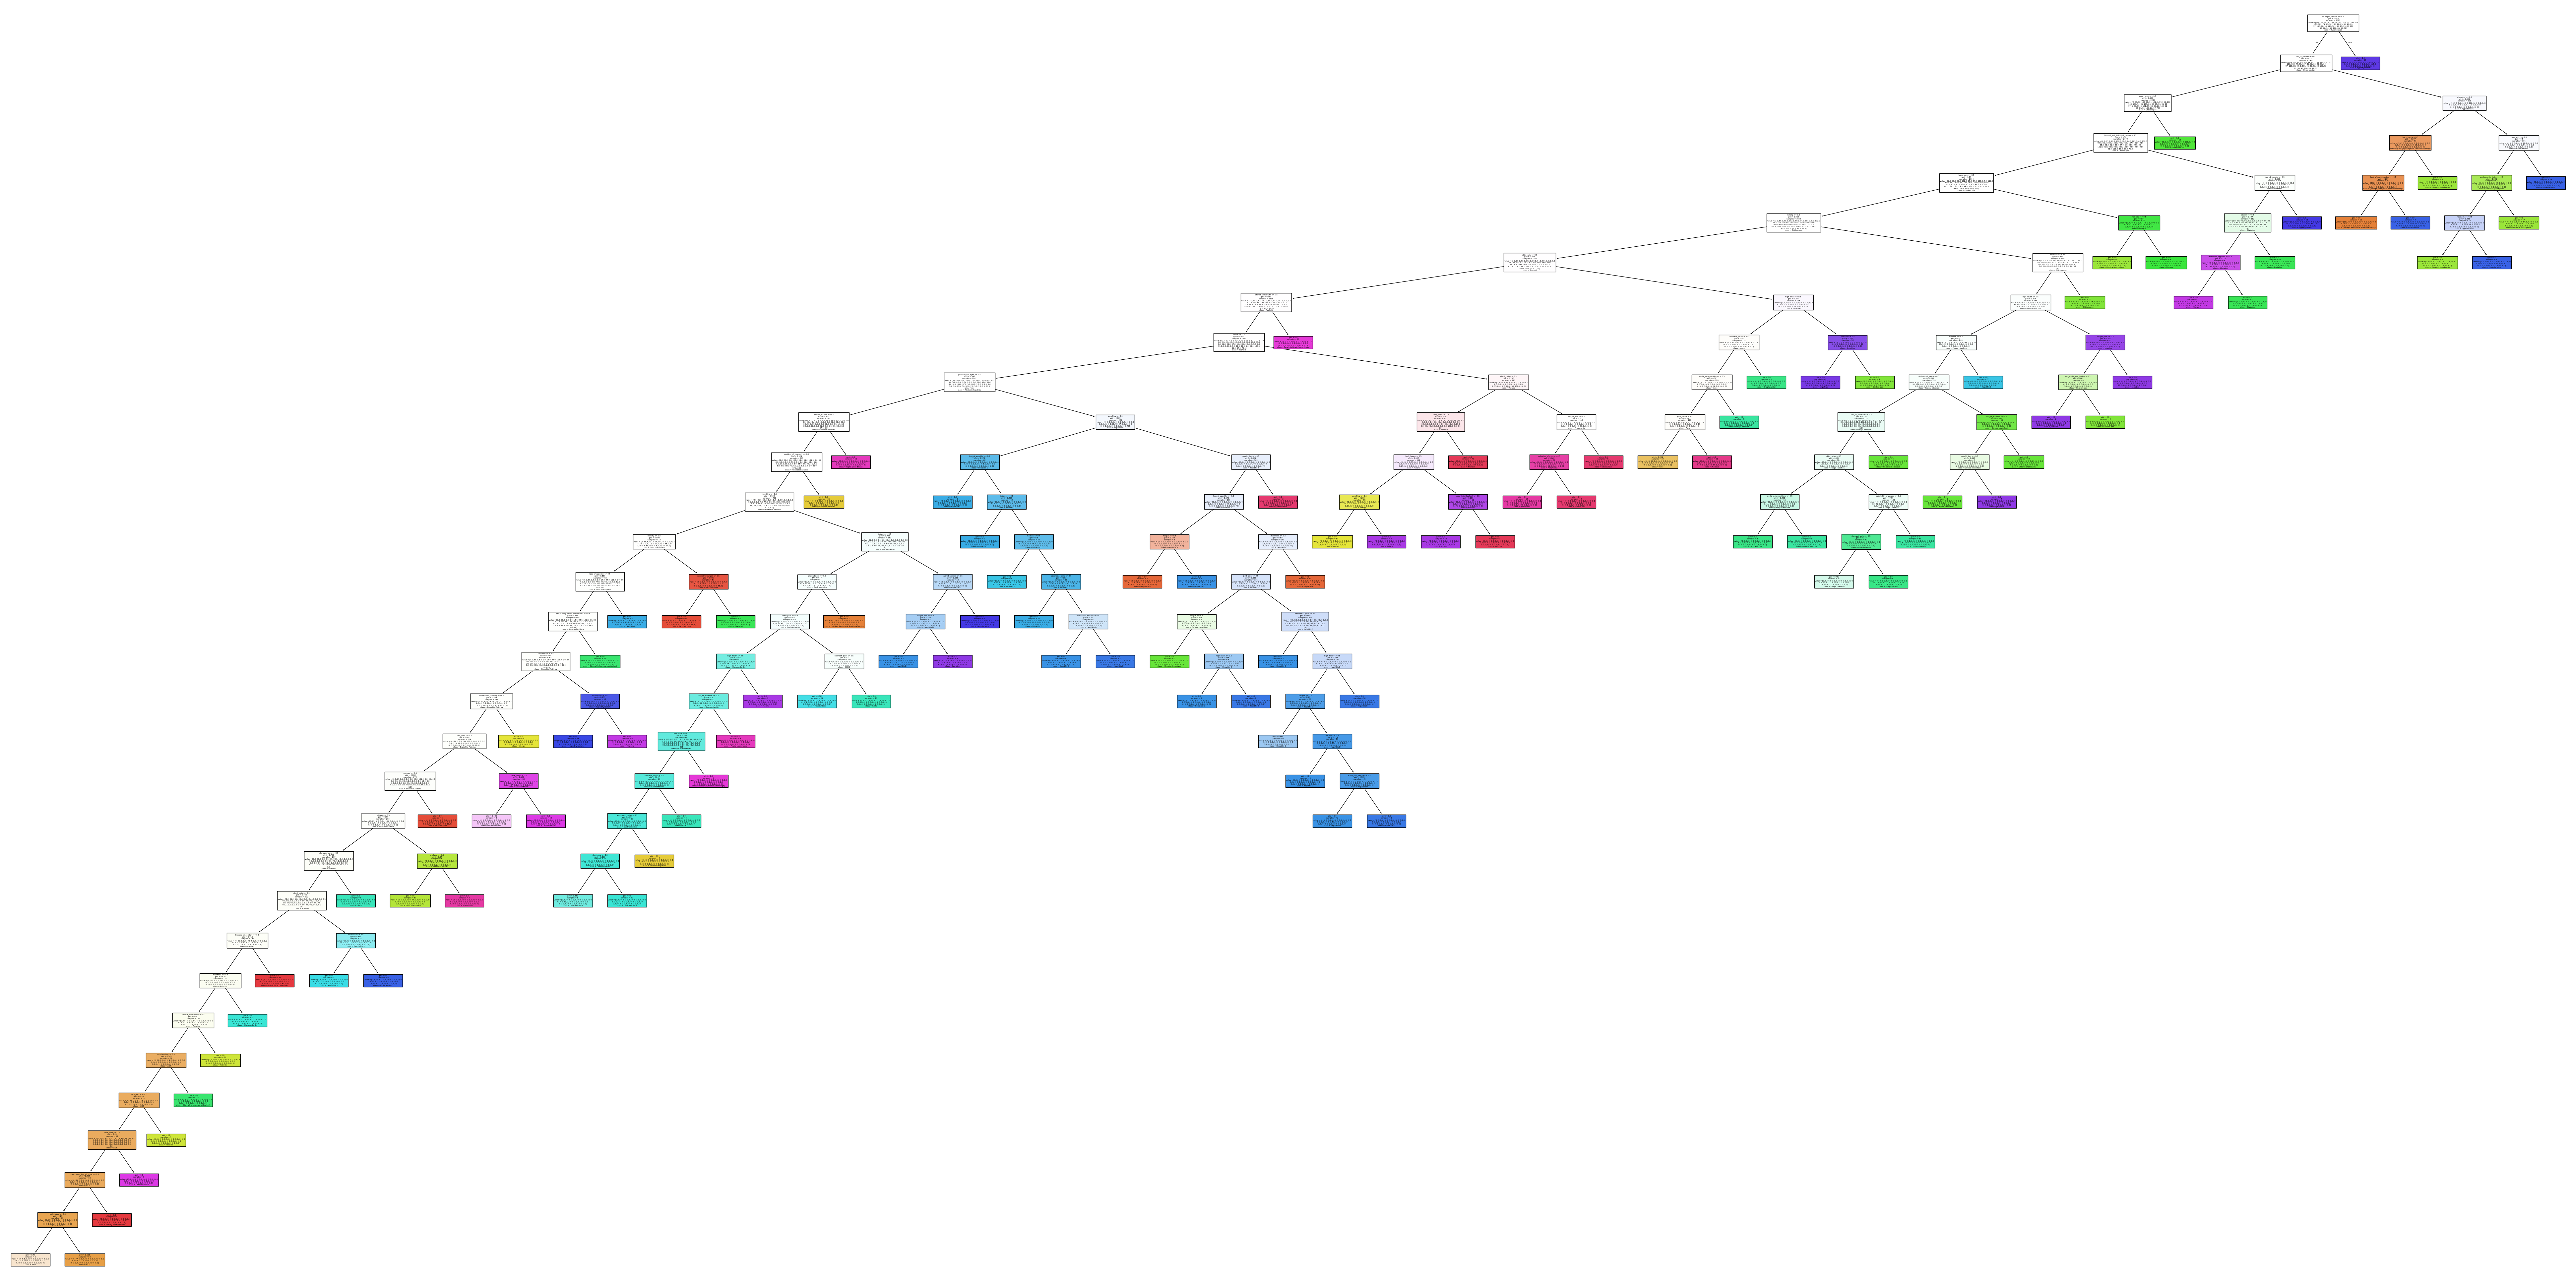

In [84]:
fig, ax = plt.subplots(figsize=(100, 50))  # Set the figure size as needed
plot_tree(tree_to_plot, filled=True, feature_names=all_symptoms, class_names=rf.classes_, ax=ax)


In [85]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define columns
table.field_names = ["MODEL name ", "Test accuracy", "Train accuracy","model name"]

# Add rows
table.add_row(["SVM (70:30)", tst_acc7030 * 100 , trn_acc7030 * 100 , "svm7030.pkl"])
table.add_row(["SVM (60:40)", tst_acc6040 * 100 , trn_acc6040 * 100 , "svm6040.pkl"])
table.add_row(["RANDOM FOREST (80:20)", rfacc * 100 , rfpreac * 100 , "RandomForest8020.pkl"])

# Print table
print(table)


+-----------------------+-------------------+-------------------+----------------------+
|      MODEL name       |   Test accuracy   |   Train accuracy  |      model name      |
+-----------------------+-------------------+-------------------+----------------------+
|      SVM (80:20)      |  97.5609756097561 | 98.47560975609755 |     svm8020.pkl      |
|      SVM (70:30)      | 98.03523035230353 | 98.40301974448316 |     svm7030.pkl      |
|      SVM (60:40)      |  98.119918699187  | 98.40785907859079 |     svm6040.pkl      |
| RANDOM FOREST (80:20) |  97.5609756097561 | 98.47560975609755 | RandomForest8020.pkl |
+-----------------------+-------------------+-------------------+----------------------+


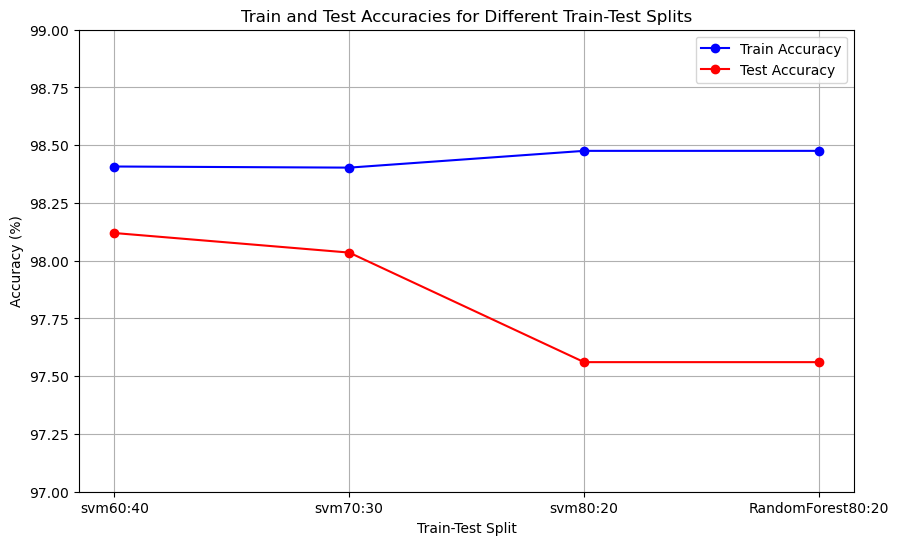

In [86]:
import matplotlib.pyplot as plt

# Data provided
train_accuracy = [98.40785907859079, 98.40301974448316, 98.47560975609755 ,98.47560975609755]
test_accuracy = [98.119918699187, 98.03523035230353, 97.5609756097561, 97.5609756097561 ]
data_splits = ["svm60:40", "svm70:30", "svm80:20" , "RandomForest80:20"]

# Plotting the accuracies for train and test sets
plt.figure(figsize=(10, 6))
plt.plot(data_splits, train_accuracy, label="Train Accuracy", marker='o', color='b')
plt.plot(data_splits, test_accuracy, label="Test Accuracy", marker='o', color='r')

# Adding labels and title
plt.xlabel("Train-Test Split")
plt.ylabel("Accuracy (%)")
plt.title("Train and Test Accuracies for Different Train-Test Splits")
plt.legend()
plt.ylim([97, 99])
plt.grid(True)
plt.show()

In [ ]:
test = pd.read_csv("data/Testing.csv")

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [88]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [89]:
xt = test[['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'chills','joint_pain', 'stomach_pain', 'vomiting', 'fatigue', 'weight_loss', 'anxiety','high_fever', 'headache', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes','back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'yellow_urine','yellowing_of_eyes', 'acute_liver_failure', 'swelling_of_stomach', 'malaise','blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'sinus_pressure','runny_nose', 'chest_pain', 'weakness_in_limbs', 'pain_during_bowel_movements','neck_pain', 'dizziness', 'cramps', 'obesity', 'puffy_face_and_eyes','enlarged_thyroid', 'brittle_nails', 'excessive_hunger', 'drying_and_tingling_lips','slurred_speech', 'muscle_weakness', 'stiff_neck', 'loss_of_balance','unsteadiness', 'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort','continuous_feel_of_urine', 'internal_itching', 'toxic_look_(typhos)', 'depression','irritability', 'altered_sensorium', 'red_spots_over_body', 'belly_pain','increased_appetite', 'lack_of_concentration', 'visual_disturbances']]
yt = test["prognosis"]

In [90]:
yp1 = svm8020.predict(xt)
yp2 = svm7030.predict(xt)
yp3 = svm6040.predict(xt)


In [91]:
acc82 = accuracy_score(yt , yp1)
acc82 * 100

100.0

In [92]:
yt

0                            Fungal infection
1                                     Allergy
2                                        GERD
3                         Chronic cholestasis
4                               Drug Reaction
5                         Peptic ulcer diseae
6                                        AIDS
7                                   Diabetes 
8                             Gastroenteritis
9                            Bronchial Asthma
10                              Hypertension 
11                                   Migraine
12                       Cervical spondylosis
13               Paralysis (brain hemorrhage)
14                                   Jaundice
15                                    Malaria
16                                Chicken pox
17                                     Dengue
18                                    Typhoid
19                                hepatitis A
20                                Hepatitis B
21                                

In [93]:
yp1

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo',
       'Fungal infection'], dtype=object)

In [94]:
acc73 = accuracy_score(yt , yp2)
acc73 * 100

100.0

In [95]:
acc64 = accuracy_score(yt , yp3)
acc64 * 100

100.0

In [96]:
yp_r = rf.predict(xt)

ac_t_rf = accuracy_score(yt,yp_r)
ac_t_rf * 100

97.61904761904762

# Dumping model

In [97]:
import joblib

joblib.dump(svm8020 , "svm8020.pkl")
joblib.dump(svm7030 , "svm7030.pkl")
joblib.dump(svm6040 , "svm6040.pkl")
joblib.dump(rf , "RandomForest8020.pkl")

['RandomForest8020.pkl']